In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#Use function fetch_openml for directly downloading datasets from Open ML dataset
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

In [10]:
print(X.shape, y.shape)
print(np.min(X), np.max(X))
print(y[0:5])

(70000, 784) (70000,)
0 255
0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [14]:
#We segment a portion of the dataset
from sklearn.neural_network import MLPClassifier

# Convertir y en entiers
y = pd.to_numeric(y)

X5 = X[y <= 3]
y5 = y[y <= 3]

mlp=MLPClassifier(
    hidden_layer_sizes=(6,),
    max_iter=200, alpha=1e-4,
    solver='sgd', random_state=2)

mlp.fit(X5, y5)

MLPClassifier(hidden_layer_sizes=(6,), random_state=2, solver='sgd')

In [15]:
print(mlp.coefs_)

[array([[-0.01115575, -0.08262854,  0.00865591, -0.01127296, -0.01387947,
        -0.02957174],
       [-0.05147818,  0.0207883 , -0.03491913, -0.04064077,  0.02111298,
         0.00507931],
       [-0.06369078,  0.00236659, -0.05500046,  0.0497324 ,  0.06169602,
        -0.00100449],
       ...,
       [ 0.03318823,  0.03072627,  0.04947788, -0.07696042, -0.02204155,
        -0.00295475],
       [ 0.03754548,  0.02460184,  0.03225107,  0.04285346, -0.07510661,
        -0.05427416],
       [-0.06503772, -0.07023683, -0.02863245, -0.01949495,  0.07608979,
        -0.05707046]]), array([[ 0.16384742, -2.14555656,  0.13976646,  0.98950216],
       [-0.03474033, -0.21458481, -0.31142723,  0.89648366],
       [-2.56161615, -0.46390046,  1.5514097 ,  1.35598971],
       [ 1.32292722, -2.67019227,  0.18579904, -0.01939295],
       [ 0.67799193, -0.71722835,  0.07473158, -1.27552058],
       [ 0.13519394,  0.09390644, -0.78005923, -0.21693196]])]


In [17]:
#we see the list of the first two elements
print(len(mlp.coefs_))

2


In [18]:
#Let's looks the shape of the hidden layer
print(mlp.coefs_[0].shape)

(784, 6)


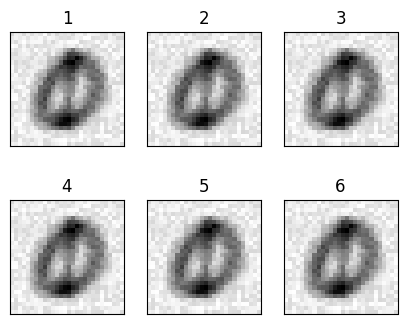

In [20]:
#visualizing the hidden layer
fig, axes = plt.subplots(2, 3, figsize=(5, 4))
for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, 1]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)
plt.show()